In [1]:
import sys
sys.path.insert(0, '..')
import pandas as pd
from bcb import Expectativas

In [2]:
em = Expectativas()
em.describe()

EntitySets:
  ExpectativasMercadoTop5Anuais
  ExpectativasMercadoInstituicoes
  ExpectativaMercadoMensais
  ExpectativasMercadoInflacao12Meses
  ExpectativasMercadoTop5Mensais
  ExpectativasMercadoTrimestrais
  ExpectativasMercadoAnuais


In [3]:
em.describe('ExpectativasMercadoAnuais')


EntitySet (Endpoint): ExpectativasMercadoAnuais
EntityType: br.gov.bcb.olinda.servico.Expectativas.ExpectativaMercadoAnual
Properties: Indicador<str>, IndicadorDetalhe<str>, Data<str>, DataReferencia<str>, Media<float>, Mediana<float>, DesvioPadrao<float>, Minimo<float>, Maximo<float>, numeroRespondentes<int>, baseCalculo<int>


In [4]:
ep = em.get_endpoint('ExpectativasMercadoAnuais')

In [5]:
df_ipca_2021 = (ep.query()
    .filter(ep.Indicador == 'IPCA')
    .filter(ep.Data >= '2021-01-01', ep.Data <= '2021-12-31')
    .filter(ep.DataReferencia == '2021', ep.baseCalculo == 1)
    .orderby(ep.Data.asc())
    .select(ep.Data, ep.Media, ep.Mediana)
    .collect())

In [6]:
df_ipca_2021.head()

,Data,Media,Mediana
0,2021-01-04,3.31,3.32
1,2021-01-05,3.29,3.30
2,2021-01-06,3.29,3.29
3,2021-01-07,3.27,3.28
4,2021-01-08,3.35,3.35


In [7]:
df_ipca_2021['Data'] = pd.to_datetime(df_ipca_2021['Data'])
df_ipca_2021 = df_ipca_2021.set_index('Data')

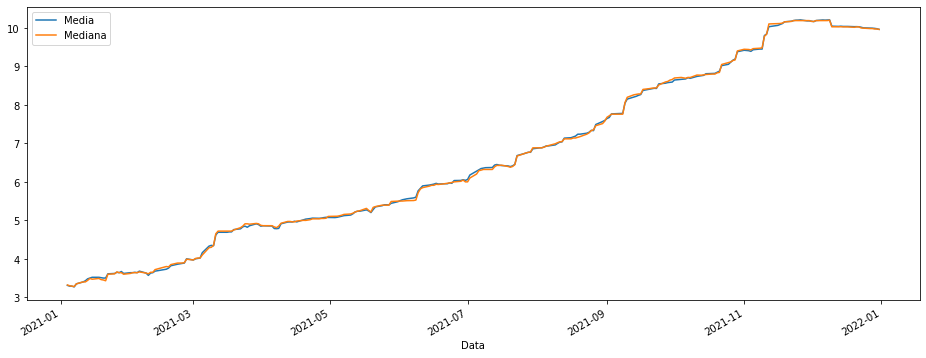

In [8]:
df_ipca_2021.plot(figsize=(16,6));